In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from Eyevents.modules.python.trajectory import *

%matplotlib inline

_plot = lambda x, t: x.iloc[:250].plot(x='time', figsize=(10, 7), title = t)

In [3]:
settings = dict(
    columns=dict(time = 't', porx = 'x', pory = 'y'),
    common=dict(
        size=[59, 33],
        resolution=[1920, 1080],
        distance=50,
        adjust_time=True, 
        normalized=True,
        reference_point=None,
        velocity_type='analytical'
    ),
    loading = dict(sep=',', decimal='.', skiprows=0, header=0),
    smoothing = dict(
        window=5,
        center=False,
        method='savgol',
        order=2,
        fillna=False
    ),
    oculus = dict(
        velocity_threshold=30,
    )
)
path = 'E:/RDir/gosniias/input/15_05_2018/ivs1.txt'
df = get_trajectory_as_df(path, settings)
df2 = smooth_trajectory_df(df, settings)
df3 = calculate_angular_parameters(df2, settings)
df4 = IVT(df3, settings)

In [4]:
df4.head()

,time,porx,pory,dt,xAng,yAng,distAng,velAng,accelAng,event
0,0.00000,356.815543,418.830480,NaN,11.373972,13.813242,0.235129,0.000000,0.000000,Fixation
1,0.01612,352.474149,425.226240,0.01612,11.226969,14.024225,0.106157,6.585414,0.000000,Fixation
2,0.03223,353.453897,428.241600,0.01611,11.260157,14.123562,0.126853,7.874190,79.998506,Fixation
3,0.04834,361.377463,422.567897,0.01611,11.528280,13.936579,0.213832,13.273242,335.136686,Fixation
4,0.06446,369.128777,428.795486,0.01612,11.790079,14.141800,0.539431,33.463448,1252.494182,Saccade


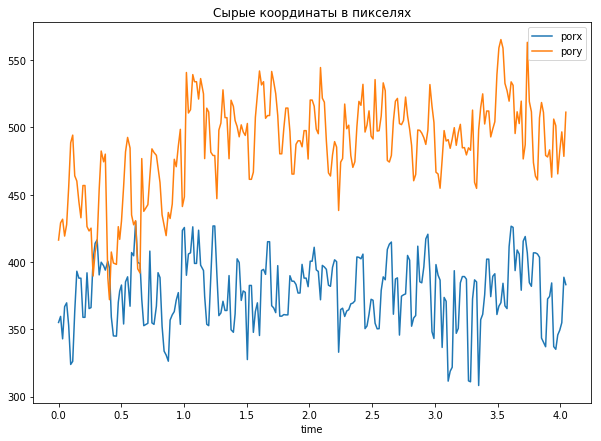

In [5]:
_plot(df, 'Сырые координаты в пикселях')

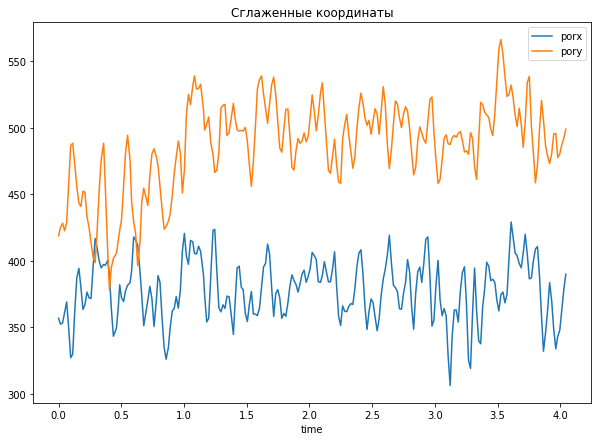

In [6]:
_plot(df2, 'Сглаженные координаты')

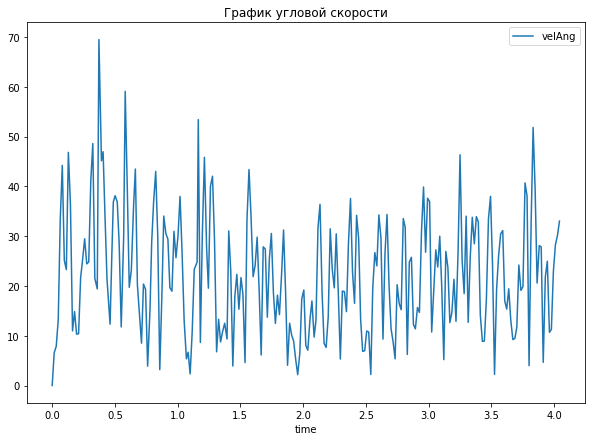

In [7]:
_plot(df3[['time', 'velAng']], 'График угловой скорости')

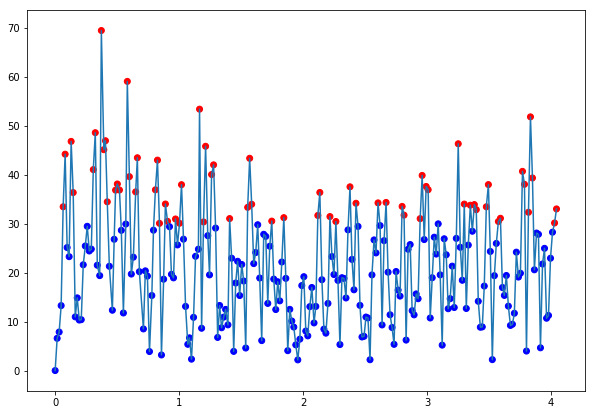

In [8]:
colors = {'Fixation': 'blue', 'Saccade': 'red'}
buf = df4[:250].copy()

plt.figure(figsize=(10,7))
plt.plot(buf['time'], buf['velAng'])
plt.scatter(buf['time'], buf['velAng'], c = buf['event'].apply(lambda x: colors[x]))